# Mathematics for formulae of odds and probabilities of mRS-level outcomes after stroke, based on time to reperfusion treatment

In this notebook we explain how to derive various formulae for probability and odds depending on time to treatment that will be used in predicting modified Rankin Scale (mRS) after stroke.

The main results for an mRS band $x$ and a time $t$:

| Quantity | Formula |
| --- | --- |
| Probability | $$ P(\mathrm{mRS}\leq x\ |\ t) = \frac{1}{1+e^{-(Ax + bx\cdot t)}} $$ |
| Odds | $$ O(\mathrm{mRS}\leq x\ |\ t) = e^{Ax + bx\cdot t} $$ |
| Log(odds) | $$ \log\bigl[O(\mathrm{mRS}\leq x\ |\ t)\bigr] = A_x + b_xt $$ |
| Constant $A_x$ |$$ A_x = \log\left[ \frac{P(\mathrm{mRS}\leq x\ |\ t=0)}{1-P(\mathrm{mRS}\leq x\ |\ t=0)} \right] $$  |
| Constant $b_x$ |$$ b_x = \frac{1}{t_{\mathrm{ne}}} \left( \log\left[ \frac{P(\mathrm{mRS}\leq x\ |\ t_\mathrm{ne})}{1-P(\mathrm{mRS}\leq x\ |\ t_\mathrm{ne})} \right] - A_x\right) $$  |

## Plain English summary 

We have [previously derived](https://github.com/samuel-book/stroke_outcome/blob/main/mrs_datasets_full.ipynb) the probabilities of mRS at $t=0\,$hr and $t=t_{\mathrm{ne}}$, the time of no effect. We need to use the data we have at these two fixed times to create formulae that describe probability at all $t$.

Since we know that probability, odds, and log(odds) are all linked, 
we only need to find a formula for one of these distributions.
That formula can then be converted into the forms required to find the other quantities.
We'll start with the simplest formula, which is for log(odds).

In the literature, the log(odds ratio) has been presented at regular time intervals and falls off approximately linearly with time $t$. This allows it to be modelled as a straight line.

> ![](../images/odds_decay.png)
> 
> The right-hand plot shows the falling log-odds ratio with time. It uses data for thrombolysis from Emberson et al. 2014 and data for thrombectomy from Fransen et al. 2016.


## Method

The steps here are, for mRS$\leq$5$^*$:
1. Define log(odds), a straight-line formula $A + bt$. 
2. Find $A$ and $b$ using the known probabilities at $t=0\,$hr and $t=t_{\mathrm{ne}}$. 
5. Define odds, an exponential decay, by converting log(odds). 
6. Define probability as a function of $t$ by converting odds. 

$^*$ We cannot include mRS$\leq$6 in these calculations, but luckily we already know that $P(\mathrm{mRS}\leq6)=1.0$ at all $t$.

Note: in this document we calculate log(odds) instead of log(odds radio) like in the plot above. It doesn't make any difference to the final result.
The log(odds ratio) is used so that it is clear at what time the log(odds ratio) falls below zero, and so when to define the time of no effect. 
Since we are using data where we already know this time of no effect and the probability distributions at that time, we can skip a step and directly model log(odds) as a straight line. 
We can make this simplification because the straight line fits to log(odds) and to log(odds ratio) share a gradient and only differ in their start and end values (their displacement in $y$). 

# Notebook admin

In [21]:
# Keep notebook cleaner once finalised
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# Set up MatPlotLib
%matplotlib inline
# Change default colour scheme:
plt.style.use('seaborn-colorblind')

# Steps to find variation with time

## Find a straight line formula for log(odds)

We start with two different ways to write log(odds):

+ Firstly, in terms of probability we have defined $$ \log\bigl[O(\mathrm{mRS}\leq x\ |\ t)\bigr] = \log\left[ \frac{P(\mathrm{mRS}\leq x\ |\ t)}{1-P(\mathrm{mRS}\leq x\ |\ t)} \right] $$
+ Secondly, we assume that there is a linear relationship between log(odds) and time for all values of mRS. This gives $$ \log\bigl[O(\mathrm{mRS}\leq x\ |\ t)\bigr] = A_x + b_xt $$ where the values of the constants $A$ and $b$ are different for each mRS band $x$. **$A$ is log(odds) at t=0**, and **$b$ is the gradient of the straight line**. We expect $b_x$ to always be negative because the log(odds) is always greater at $t=0$ than at the no-effect time.

Equating these gives the following relation that holds for all $t$:

$$ A_x + b_xt = \log\left[ \frac{P(\mathrm{mRS}\leq x\ |\ t)}{1-P(\mathrm{mRS}\leq x\ |\ t)} \right] $$ 


To find $A$ and $b$, we need to consider the values of log(odds) when $t=0\,$hr or $t=t_{\mathrm{ne}}$, as this is the data available to us.

When $t=0$,

$$ A_x = \log\left[ \frac{P(\mathrm{mRS}\leq x\ |\ t=0)}{1-P(\mathrm{mRS}\leq x\ |\ t=0)} \right] $$ 

When $t=t_{\mathrm{ne}}$,

$$
\begin{align*}
A_x + b_xt_{\mathrm{ne}} &= \log\left[ \frac{P(\mathrm{mRS}\leq x\ |\ t_\mathrm{ne})}{1-P(\mathrm{mRS}\leq x\ |\ t_\mathrm{ne})} \right] \\
b_x &= \frac{1}{t_{\mathrm{ne}}} \left( \log\left[ \frac{P(\mathrm{mRS}\leq x\ |\ t_\mathrm{ne})}{1-P(\mathrm{mRS}\leq x\ |\ t_\mathrm{ne})} \right] - A_x\right) 
\end{align*}
$$

In both cases, we know all of the $P$ and $t$ terms on the right-hand-side and so we can calculate $A$ and $b$.

## Find an exponential formula for odds with time

We can take the exponential of $ \log\bigl[O(\mathrm{mRS}\leq x\ |\ t)\bigr] = A_x + b_xt $ to find an equation for odds:

$$ O(\mathrm{mRS}\leq x\ |\ t) = e^{Ax + bx\cdot t} $$

To see how this behaves, we can split the two terms in the exponential:

$$ O(\mathrm{mRS}\leq x\ |\ t) = e^{Ax} \cdot e^{bx\cdot t} $$

and use $A_x = \log\bigl[O(\mathrm{mRS}\leq x\ |\ t=0)\bigr]$, so 

$$ O(\mathrm{mRS}\leq x\ |\ t) = O(\mathrm{mRS}\leq x\ |\ t=0) \cdot e^{bx\cdot t} $$

This tells us that odds will decay exponentially with time because $b_x$ is always negative.

## Find a logistic formula for probability with time

Now we can set the expression for the odds ratio in exponential form equal to its definition in terms of probability:

$$O(\mathrm{mRS}\leq x\ |\ t) \phantom{g} = \phantom{g} e^{Ax + bx\cdot t} \phantom{g} = \phantom{g} \frac{P(\mathrm{mRS}\leq x\ |\ t)}{1 - P(\mathrm{mRS}\leq x\ |\ t)} $$

By setting $P \equiv P(\mathrm{mRS}\leq x\ |\ t)$ and odds $O \equiv e^{Ax + bx \cdot t}$, we can invert this to find a formula for $P$:

$$
\begin{align*} 
O & = \frac{P}{1 - P} \\
O(1-P) & = P \\
O - (O\cdot P) & = P \\ 
O & = P + (O\cdot P) \\
O & = P(1+O) \\
\frac{O}{1+O} & = P \\
\end{align*}
$$

To simplify this, we can multiply the left-hand-side by a factor of $\frac{1}{O}\div\frac{1}{O}$, which is equal to 1:

$$ P \phantom{g} = \phantom{g} \frac{O}{1+O} \cdot  \frac{\frac{1}{O}}{\frac{1}{O}} \phantom{g} = \phantom{g}  \frac{1}{\frac{1}{O} + 1}$$

Then $\frac{1}{O} = O^{-1} = \bigl(e^{Ax+bx\cdot t}\bigr)^{-1} = e^{-(Ax+bx\cdot t)}$, so

$$ P(\mathrm{mRS}\leq x\ |\ t) = \frac{1}{1+e^{-(Ax + bx\cdot t)}} $$

Finally, we have a formula to calculate $P$ at any time $t$.

> __An optional extra step:__
>
> This equation for $P(\mathrm{mRS}\leq x\ |\ t)$ is almost in the form of a [logistic function](https://en.wikipedia.org/wiki/Logistic_function):
>
> $$ f(x) = \frac{L}{1 + e^{-k(x - x_0)}} $$
>
> With one more rearrangement $ A_x + b_x t = b_x\left(t +\frac{Ax}{bx}\right) $, we have:
> 
> $$ P(\mathrm{mRS}\leq x\ |\ t) = \frac{1}{1+\exp{\bigl[-b_x\left(t +\frac{Ax}{bx}\right)\bigr]}} $$
>
> Compared with $f(x)$ above, $L=1$, $k=b_x$, $x=t$, and $x_0 = -\frac{Ax}{bx}$.

## Application to mRS distributions

### Collect the data

Load mRS distributions of probabilities in each bin, $P(\mathrm{mRS}=x)$:

In [25]:
mrs_prob_all = pd.read_csv(
    './outcome_utilities/mrs_dist_probs_bins.csv', index_col='Stroke type')

mrs_prob_all

,0,1,2,3,4,5,6
Stroke type,,,,,,,
pre_stroke_nlvo,0.582881,0.162538,0.103440,0.102223,0.041973,0.006945,0.000000
pre_stroke_nlvo_ivt_deaths,0.576469,0.160750,0.102302,0.101099,0.041511,0.006869,0.011000
pre_stroke_lvo,0.417894,0.142959,0.118430,0.164211,0.113775,0.042731,0.000000
pre_stroke_lvo_ivt_deaths,0.403644,0.138084,0.114392,0.158611,0.109895,0.041274,0.034100
pre_stroke_lvo_mt_deaths,0.401178,0.137241,0.113693,0.157643,0.109224,0.041022,0.040000
no_treatment_nlvo,0.197144,0.262856,0.120032,0.127736,0.147909,0.062025,0.082298
no_effect_nlvo_ivt_deaths,0.197271,0.262729,0.117583,0.124669,0.142991,0.059211,0.095546
t0_treatment_nlvo_ivt,0.429808,0.200192,0.108212,0.110215,0.080760,0.027113,0.043700
no_treatment_lvo,0.050000,0.079000,0.136000,0.164000,0.247000,0.135000,0.189000


Cumulative probabilities, $P(\mathrm{mRS}\leq x))$:

In [26]:
mrs_cprob_all = pd.read_csv(
    './outcome_utilities/mrs_dist_probs_cumsum.csv', index_col='Stroke type')

mrs_cprob_all

,0,1,2,3,4,5,6
Stroke type,,,,,,,
pre_stroke_nlvo,0.582881,0.745419,0.848859,0.951082,0.993055,1.000000,1.0
pre_stroke_nlvo_ivt_deaths,0.576469,0.737219,0.839522,0.940620,0.982131,0.989000,1.0
pre_stroke_lvo,0.417894,0.560853,0.679283,0.843494,0.957269,1.000000,1.0
pre_stroke_lvo_ivt_deaths,0.403644,0.541728,0.656119,0.814731,0.924626,0.965900,1.0
pre_stroke_lvo_mt_deaths,0.401178,0.538419,0.652112,0.809754,0.918978,0.960000,1.0
no_treatment_nlvo,0.197144,0.460000,0.580032,0.707768,0.855677,0.917702,1.0
no_effect_nlvo_ivt_deaths,0.197271,0.460000,0.577583,0.702252,0.845244,0.904454,1.0
t0_treatment_nlvo_ivt,0.429808,0.630000,0.738212,0.848427,0.929188,0.956300,1.0
no_treatment_lvo,0.050000,0.129000,0.265000,0.429000,0.676000,0.811000,1.0


### Plot the new time distributions

Find the probabilities with time for three main groups of patients:
+ nLVO treated with IVT
+ LVO treated with IVT
+ LVO treated with MT

The following cell defines some colours:

In [27]:
colour_list = np.array([
    '#0072B2', '#009E73', '#D55E00', '#CC79A7',
    '#F0E442', '#56B4E9', 'DarkSlateGray'], dtype='<U13'
)

The following cell draws the variations with time. 

In [40]:
def plot_three_with_time(ylabels, data_lists, t_ne=8.0):
    fig, axs = plt.subplots(1,3, figsize=(15,5), gridspec_kw={'wspace':0.3, 'top': 0.8})
    for d,data_list in enumerate(data_lists):
        ax = axs[d]
        ax.grid()
        d_t0 = data_list[0]
        d_no = data_list[1]
        for i in range(6):
            ax.scatter([0.0,t_ne], [d_t0[i],d_no[i]],
                       color=colour_list[i], edgecolor='k', 
                       label=f'$\leq${i}', zorder=3)

        ax.set_ylabel(ylabels[d].split('\n')[0])
        ax.set_title(ylabels[d], fontsize=15)
        ax.set_xticks(np.arange(0,t_ne+1,1))
        ax.set_xlabel('Onset to treatment time (hours)')
        if d==1:
            ax.legend(loc='upper center', bbox_to_anchor=[0.5, -0.15], 
                      ncol=7, title='mRS')

    axs[0].set_ylim(0.0, 1.0)
    # axs[1].set_ylim(0.0, 11.5)
    axs[2].axhline(0.0, color='k', linewidth=1)
    return fig, axs

The following cell runs the plotting function for the main three groups of patients. Each time it reads the relevant data from the data we imported earlier, calculates A and b, and then uses those to calculate probability, odds, and log odds across very many times. The varying probabilities, odds, and log-odds with time are then plotted.

In [41]:
def make_data_and_plot(key, occ, tre, df_consts):

    t_ne = 6.3 if tre == 'ivt' else 8.0

    # Which data will we keep?
    t0_st = f't0_treatment_{occ}_{tre}'
    ne_st = f'no_effect_{occ}_{tre}_deaths'

    # Read data from the reference dataframe:
    mrs_prob_t0 = mrs_prob_all.loc[t0_st].values
    mrs_prob_ne = mrs_prob_all.loc[ne_st].values
    mrs_cprob_t0 = mrs_cprob_all.loc[t0_st].values
    mrs_cprob_ne = mrs_cprob_all.loc[ne_st].values
    # Convert probs to odds:
    mrs_odds_cumsum_t0 = mrs_cprob_t0 / (1.0 - mrs_cprob_t0)
    mrs_odds_cumsum_ne = mrs_cprob_ne / (1.0 - mrs_cprob_ne)
    # Manually set mRS<=6 values to infinity, since P(mRS<=6)=1:
    mrs_odds_cumsum_t0[-1] = np.inf 
    mrs_odds_cumsum_ne[-1] = np.inf
    # Convert odds to log-odds:
    mrs_logodds_cumsum_t0 = np.log(mrs_odds_cumsum_t0)
    mrs_logodds_cumsum_ne = np.log(mrs_odds_cumsum_ne)

    # Gather everything for the plot:
    data_lists = [
        [mrs_cprob_t0, mrs_cprob_ne],
        [mrs_odds_cumsum_t0, mrs_odds_cumsum_ne],
        [mrs_logodds_cumsum_t0, mrs_logodds_cumsum_ne]
        ]

    # Calculate constants:
    # Use the [:-1] slice to exclude mRS<=6.
    A = (np.log(mrs_cprob_t0[:-1]) - 
         np.log(1.0 - mrs_cprob_t0[:-1])) 
    b = (np.log(mrs_cprob_ne[:-1]) - 
         np.log(1.0 - mrs_cprob_ne[:-1]) -A) / t_ne
    # Place these constants in the shared results DataFrame:
    df_consts[[f'{occ}_{tre}_A', f'{occ}_{tre}_b']] = np.array([A, b]).T

    # Plot setup:
    ylabels = [
        ('Probability\n'+r'$P$(mRS$\leq$ x | t) = '+
        r'$\frac{1}{1 + e^{-(Ax + bx\cdot t)}}$'), 
        'Odds\n'+r'$O$(mRS$\leq$ x | t) = $e^{(A_x + b_x\cdot t)}$', 
        'log(Odds)\n'+r'$\log$[$O$(mRS$\leq$ x | t)] = $A_x + b_x\cdot t$'
        ]
    # Plot over this time range:
    t = np.arange(0, t_ne+0.1, 0.1)
    
    # Make the same plot as earlier...
    fig, axs = plot_three_with_time(ylabels, data_lists, t_ne)
    
    # ... and now add lines to connect the starting data points: 
    for d, ax in enumerate(axs):
        for i in range(6):
            if d==0: # Probability:
                yvals = 1.0/(1.0 + np.exp(-b[i]*(t+A[i]/b[i])) )
            elif d==1: # Odds:
                yvals = np.exp(A[i] + b[i]*t)
            else: # log(odds):
                yvals = A[i] + b[i]*t
            ax.plot(t, yvals, color=colour_list[i], zorder=2)

    # Set shared axis limits:
    axs[1].set_ylim(-1, 23)
    axs[2].set_ylim(-3.2, 3.2)
    for ax in axs:
        ax.set_xlim(-0.3, 8.3)

    fig.suptitle(key.replace('_', ' with '), fontsize=20)
    plt.savefig(f'./images/time_varying_probs_odds_logodds_{key}.jpg', 
                dpi=300, bbox_inches='tight')
    plt.show()

As we create the plots, store a copy of the A and b constants in this dataframe:

In [46]:
df_consts = pd.DataFrame(index=np.arange(6))
df_consts.index.name = 'mrs'

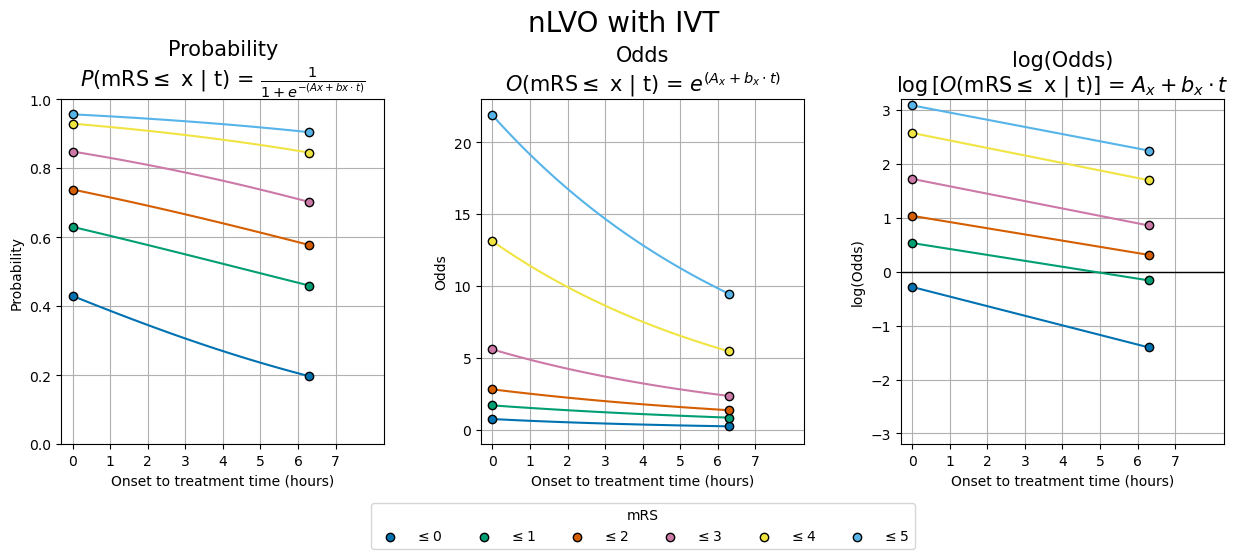

In [47]:
make_data_and_plot('nLVO_IVT', 'nlvo', 'ivt', df_consts)

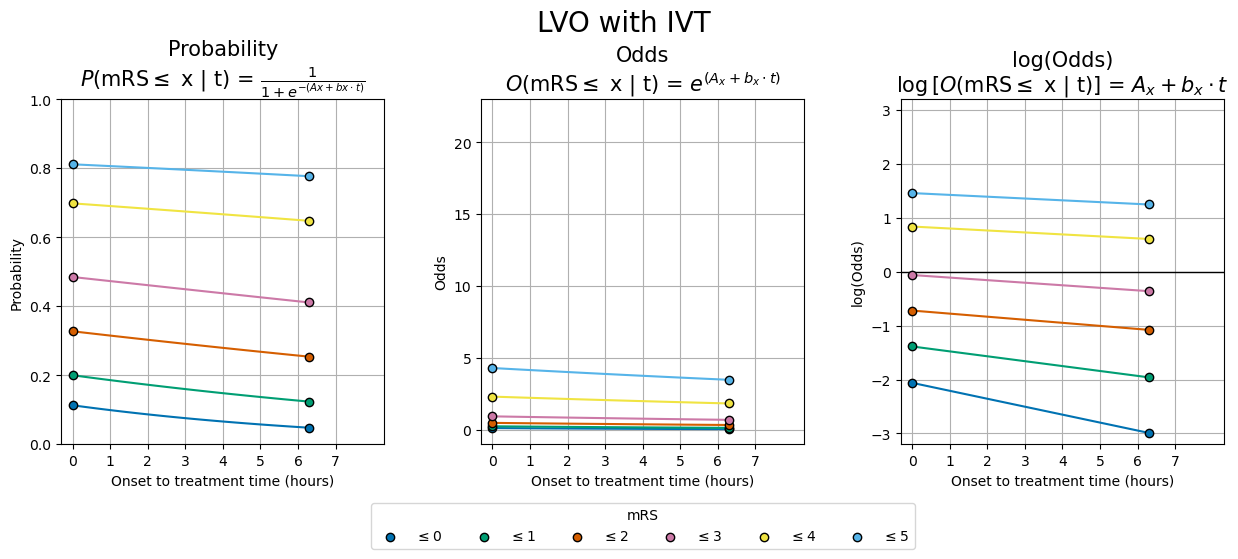

In [48]:
make_data_and_plot('LVO_IVT', 'lvo', 'ivt', df_consts)

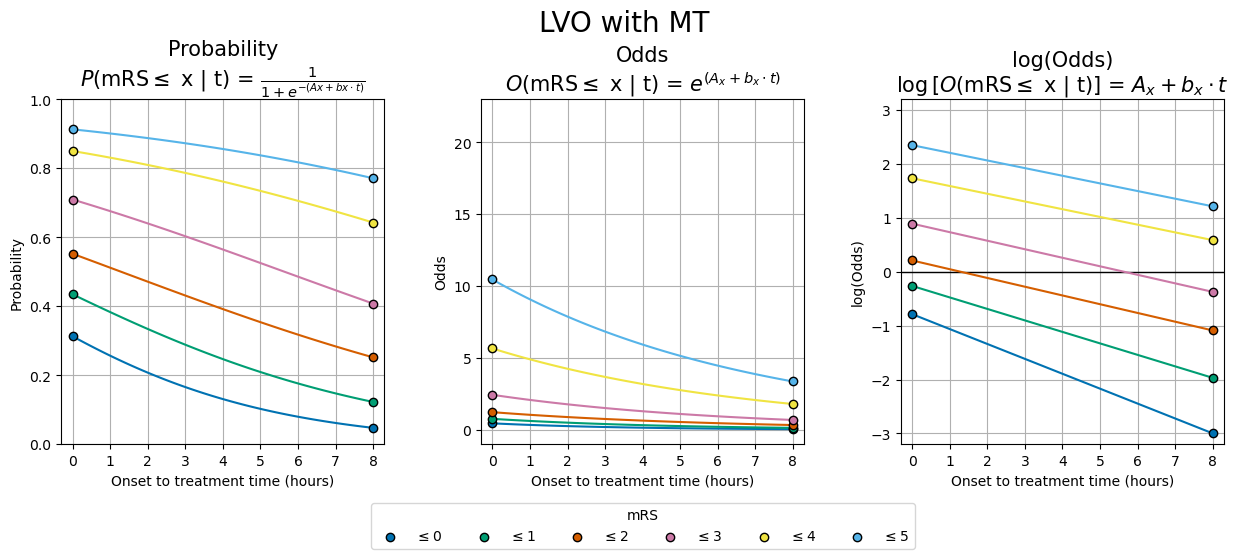

In [49]:
make_data_and_plot('LVO_MT', 'lvo', 'mt', df_consts)

The values of A and b for each occlusion-treatment combination:

In [50]:
df_consts

,nlvo_ivt_A,nlvo_ivt_b,lvo_ivt_A,lvo_ivt_b,lvo_mt_A,lvo_mt_b
mrs,,,,,,
0,-0.282636,-0.177905,-2.061295,-0.147351,-0.787214,-0.276300
1,0.532217,-0.109930,-1.386294,-0.090905,-0.263622,-0.213008
2,1.036698,-0.114895,-0.720071,-0.056837,0.209022,-0.162171
3,1.722319,-0.137186,-0.060990,-0.047460,0.891870,-0.158096
4,2.574277,-0.139128,0.838796,-0.036570,1.733804,-0.143360
5,3.085734,-0.133017,1.459413,-0.033607,2.347684,-0.141715


As expected, $A$ is equal to the log-odds at $t=0\,$hr and all of the $b$ values are negative because log(odds) decreases with time.

Save the constants to file:

In [31]:
df_consts.to_csv('probs_time_constants.csv')

# References

Emberson J, Lees KR, Lyden P, et al. Effect of treatment delay, age, and stroke severity on the effects of intravenous thrombolysis with alteplase for acute ischaemic stroke: A meta-analysis of individual patient data from randomised trials. The Lancet 2014;384:1929–35. doi:10.1016/S0140-6736(14)60584-5

Fransen PSS, Berkhemer OA, Lingsma HF, et al. Time to Reperfusion and Treatment Effect for Acute Ischemic Stroke: A Randomized Clinical Trial. JAMA Neurol 2016;73:190–6. doi:10.1001/jamaneurol.2015.3886